**work in progress**

這篇主要是介紹前幾天寫的`utils`

# Local Settings

In [1]:
key1 = list(globals().keys())

In [2]:
from learning2read.b04 import *

因為`import *`而額外多出的全域變數們：

In [3]:
key2 = list(globals().keys())
[x for x in key2 if x not in key1]

['key1',
 '_i2',
 'Pow2AutoEncoder',
 'alod',
 'DataLoader',
 'save_pickle',
 'load_pickle',
 'Index',
 'IndexFold',
 'list_diff',
 'Path',
 'torch',
 'defaultdict',
 'pd',
 'np',
 'lgb',
 'PATH_MAC',
 'PATH_LIN2',
 'PathMgr',
 'DataMgr',
 'File',
 'Data',
 'LightGBMRandomForest',
 'BookVectorPow2AutoEncoder',
 'UserVectorPow2AutoEncoder',
 '_i3']

# Data Loader

（由`b04` module產生的函數）  
`Data = PathMgr(PATH_MAC['data'])` $\equiv$ `PathMgr("/Users/qtwu/Downloads/data")`

In [4]:
import learning2read
learning2read.reload_all()

In [5]:
Data("submit").shape, Data("btest").shape

/Users/qtwu/Downloads/data/submission.csv
/Users/qtwu/Downloads/data/book_ratings_test.csv


((173469, 1), (173469, 2))

In [6]:
from learning2read.preprocessing import TotalDataFrame
df_total = TotalDataFrame.run(
    [Data("btrain"), Data("btest"), Data("implicit")])['output']
df_total.sample(10)

/Users/qtwu/Downloads/data/book_ratings_train.csv
/Users/qtwu/Downloads/data/book_ratings_test.csv
/Users/qtwu/Downloads/data/implicit_ratings.csv


/Users/qtwu/anaconda/lib/python3.6/site-packages/learning2read/preprocessing.py:128: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  output = pd.concat(input_data, axis=0, ignore_index=True)


Book-Rating        ISBN     User-ID
456400           0.0  8436102231  2fd476aa96
1046963          0.0  0446301582  f95817f277
857201           0.0  0679724532  187c74fb77
941212           0.0  0446607657  7007df9b76
434472           0.0  0064400859  464e3938e6
500043           0.0  0446387878  bf94103fe7
279320          -1.0  0552145084  87c9bd349a
910400           0.0  0030298210  c7578f58dd
606021           0.0  0553118773  ec0a75b09e
429360          -1.0  0060611626  4572abb918

# HeatMap & Save/Load Pickle

In [7]:
book = df_total.groupby('ISBN').count()['User-ID'].sort_values(ascending=False)
user = df_total.groupby('User-ID').count()['ISBN'].sort_values(ascending=False)

In [14]:
len(book), len(user)

(340556, 105283)

In [8]:
trim_n = 200
book_t = book[:trim_n]
user_t = user[:trim_n]

In [9]:
from collections import defaultdict
is_selected = defaultdict(lambda:False)
for idx_tag in book_t.index:
    is_selected[idx_tag] = True
for idx_tag in user_t.index:
    is_selected[idx_tag] = True

In [11]:
# # slow
# nlod=[]
# for r in alod(df_total):
#     if is_selected[r['ISBN']] and is_selected[r['User-ID']]:
#         nlod.append(r)
# df_total_selected = pd.DataFrame(nlod)
# df_total_selected=df_total_selected.set_index('index')

# # save_pickle(File("df_total_selected"),df_total_selected)

# resume
df_total_selected = load_pickle(File("df_total_selected"))

df_total_selected.sample(3)

Book-Rating        ISBN     User-ID
index                                      
872189          0.0  0316781266  91e92f833e
970123          0.0  0142001740  46f55944be
950888          0.0  0446672211  48ff993017

In [12]:
from learning2read.plot import HeatMap
obj = HeatMap()
obj.setup(df_total_selected, True)
obj.setup_visualMap(min=-1,max=10)
obj.add('ISBN','User-ID','Book-Rating',
        ftooltip=lambda r:{
            'formatter':'<br>'.join([
                '%.0d'%r['Book-Rating'],
                '%s'%r['ISBN'],
                '%s'%r['User-ID'],
            ])
        })
obj._option['visualMap']={
    'type':'piecewise',
    'pieces': [
        {'gte' : 8, 'lte' : 10, 'color' : 'blue'},
        {'gte' : 5, 'lte' : 7, 'color' : 'yellow'},
        {'gte' : 1, 'lte' : 4, 'color' : 'red'},
        {'value' : -1, 'color' : 'black'},
        {'value' : 0, 'color' : 'grey'},
    ]
}
obj

# Index Control

In [ ]:
from learning2read.utils import Index,IndexFold,list_diff

`Index(n, total_n, seed)`

In [ ]:
df_total.iloc[Index(5,100,1),:]

`Index(frac, total_n, seed)`

In [ ]:
df_total.iloc[Index(0.05,100,1),:]

`IndexFold(k_fold, total_n, seed)`

In [ ]:
k_fold = 3
for i_fold in range(k_fold):
    print(df_total.iloc[IndexFold(k_fold,15,1)[i_fold],:])

`list_diff(all_set, validation_set)`

In [ ]:
i_fold=2
idx_valid = IndexFold(k_fold,15,1)[i_fold]
idx_train = list_diff(range(15), IndexFold(k_fold,15,1)[i_fold])
print(df_total.iloc[idx_valid,:])
print(df_total.iloc[idx_train,:])

***

In [ ]:
import pandas as pd
import numpy as np
import scipy
from learning2read.utils import DataLoader
def Data(key,**kwargs):
    return DataLoader(r"/Users/qtwu/Downloads/data").load(key,**kwargs)
# raw_train=Data("brtrain")
# raw_test=Data("brtest")
# raw_implicit=Data("brimplicit")

# truncated data for test
raw_train=Data("brtrain").sample(20000)
raw_test=Data("brtest").sample(13000)
raw_implicit=Data("brimplicit").sample(50000)
raw_train.shape, raw_test.shape, raw_implicit.shape, 

In [ ]:
learning2read.reload_all()
from learning2read.utils import DataLoader
Data("submission").shape

In [ ]:
PATH

In [ ]:

df = pd.read_csv("/Users/qtwu/Downloads/data/submission.csv",header=None)
print(df.shape)
df.iloc[:10,:]

***

# 4003 to dict

In [ ]:
procedure4003 = [
    {
        'class' : 'learning2read.preprocessing.TotalDataFrame',
        'output' : 'df_total',
        'input_data' : ['raw_train', 'raw_test', 'raw_implicit'],
        'train_drop' : None, # for cross validation
        'test_fill' : -1,
    },
    {
        'class' : 'learning2read.preprocessing.UserRatingSqueeze',
        'output' : 'user_rating',
        'input_data' : 'raw_train',
        'filter_num' : 3, # treat user[nbook<3] as NA
        'statistics' : ['mean','mode','std','skew','kurtosis'],
        'na_policy' : 'median',
        # quantile11 = [min, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, max]
    },
    {
        'class' : 'learning2read.preprocessing.BookRatingSqueeze',
        'output' : 'book_rating',
        'input_data' : 'raw_train',
        'filter_num' : 3,
        'statistics' : ['mean','mode','std','skew','kurtosis'],
        'na_policy' : 'median',
    },
    {
        'class'  : 'learning2read.b04.BookVectorPow2AutoEncoder',
        'output' : 'book_vector',
        'input_data' : 'df_total',
        'domain_filter_num' : 2, # book with >=2 users
        'codomain_filter_num' : 1000, # user with >=1000 books
        'param' : {
            'code_length' : 16, 
            'activation' : 'SELU', 
            'solver' : 'Adam', 
            'learning_rate' : 0.01,
            'epochs' : 10,
            'random_state' : 1,
        },
    },
    {
        'class'  : 'learning2read.preprocessing.UserBookTable',
        'output' : 'df_total_features', # (X,y={-1,0,1,2,...,10})
        'input_data' : ['df_total', 'user_rating', 'book_rating', 'book_vector'],
        'na_policy' : None, # should fill it before training
    },
    {
        'class'  : 'learning2read.preprocessing.RowFilter',
        'output' : 'df_train',
        'input_data' : 'df_total_features',
        'func' : r"lambda df : df['Book-Rating']>0",
    },
    {
        'class'  : 'learning2read.b04.LightGBMRandomForest',
        'output' : 'model_rf', # a sklearn like model with (fit,predict)
        'input_data' : 'df_train',
        'param' : {
            'random_state' : 1,
        }
    },
    {
        'class'  : 'learning2read.preprocessing.RowFilter',
        'output' : 'df_test',
        'input_data' : 'df_total_features',
        'func' : r"lambda df : df['Book-Rating']<0",
    },
    # there should be a ColFilter to delete 'Book-Rating'
    {
        'class'  : 'learning2read.submission.Track1',
        'output' : 'track1',
        'input_data' : ['df_test', 'model_rf'],
    },
    {
        'class'  : 'learning2read.submission.Track2',
        'output' : 'track2',
        'input_data' : ['df_test', 'model_rf'],
    },
]

In [ ]:
import learning2read
from importlib import reload
reload(learning2read)
learning2read.reload_all()

P=Procedure(procedure4003[:], True).load_data({
    'raw_train': raw_train,
    'raw_test': raw_test,
    'raw_implicit': raw_implicit,
})
P.run()
P.var.keys()

In [ ]:
P.run()

In [ ]:
df_train = P.var['df_train']
model_rf = P.var['model_rf']
i=1005
n=10
df_sub = df_train.iloc[i:i+n,:]
x = df_sub.iloc[:,1:]
y=model_rf.predict(x)
y, df_sub

In [ ]:
# learning2read.reload_all()
# import learning2read.b04
# P.run_id(1)
print(P.var['df_total_features'].describe())

In [ ]:
import seaborn
seaborn.pairplot(P.var['user_vector'].sample(1000))


User Vector
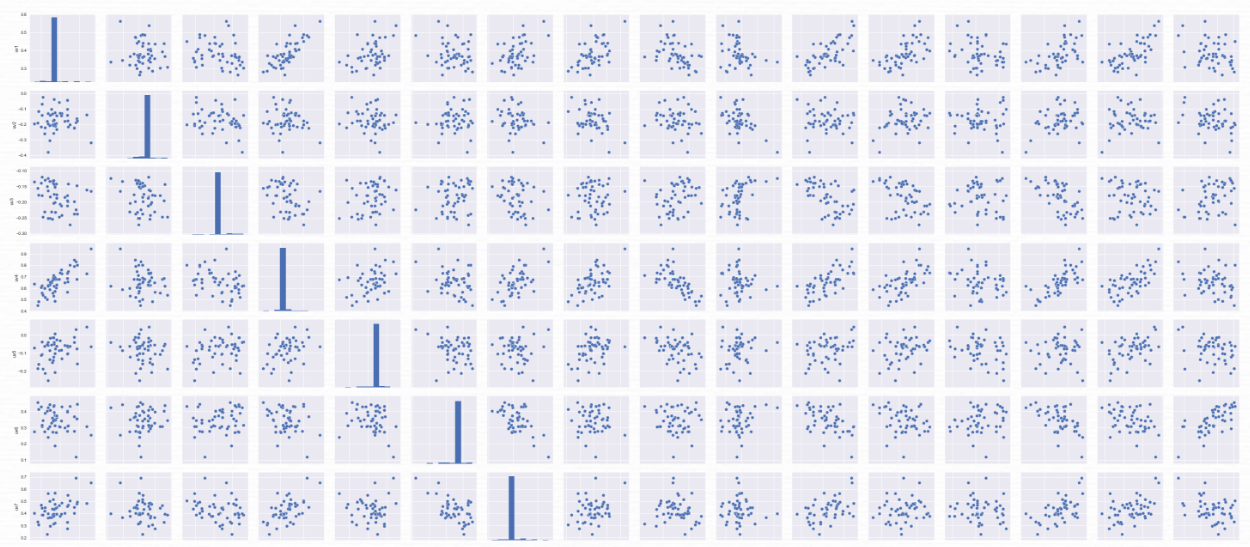

Book Vector
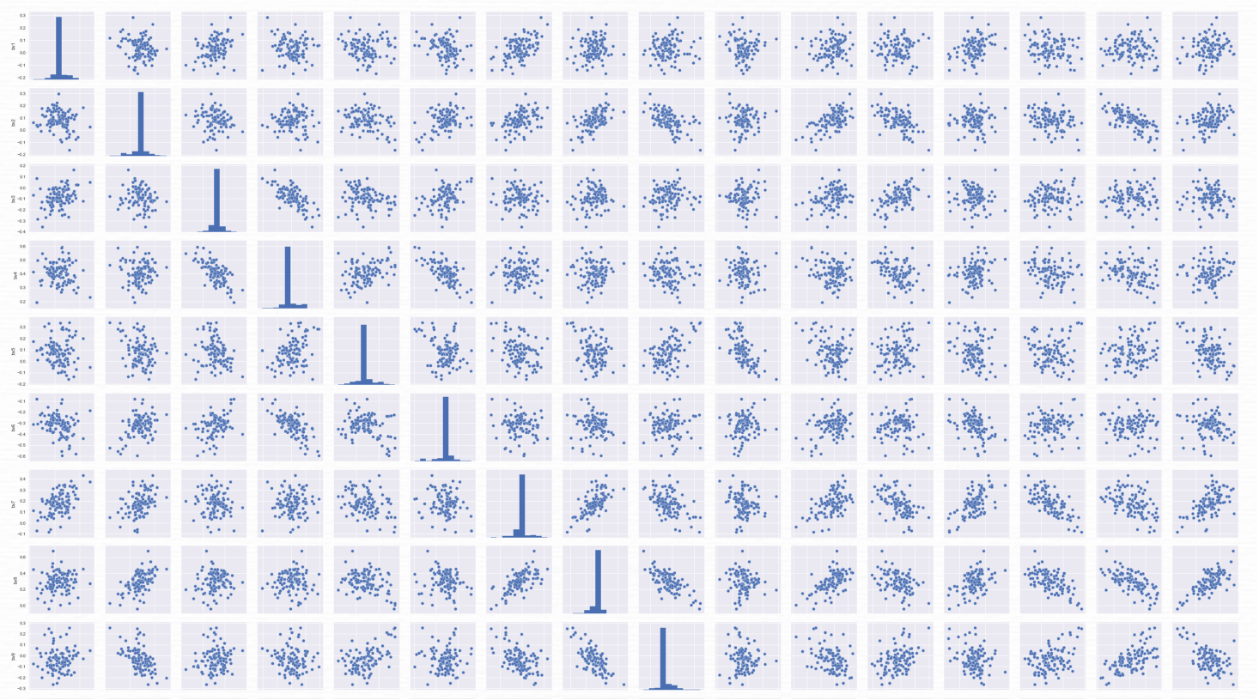

In [ ]:
from learning2read.unsupervised import Pow2AutoEncoder
model=Pow2AutoEncoder(code_length=2)
toy_x=pd.DataFrame([[1,1,1,1,1,0],[0,1,1,1,1,1],[0,0,1,0,0,0]])
model.fit(toy_x)
model

In [ ]:
save_pickle("/tmp/ae.pk",model)

In [ ]:
model.predict(torch.randn(100,6))

In [ ]:
from learning2read.utils import load_pickle
p6=load_pickle("/Users/qtwu/Dropbox/_a5_Projects/EmptyCup106-2/MLTech-Final/playground/P6_6.pk")
globals().update(p6.var)
p6.var.keys()

In [ ]:
p6.var.keys()

In [ ]:
df_train.columns[:4]

In [ ]:
df_train.shape

In [ ]:
import seaborn
of=42
seaborn.pairplot(df_train.sample(3000),
                 y_vars=df_train.columns[:1],
                 x_vars=df_train.columns[1+of:5+of])

***

DEV Code

In [ ]:
# from collections import defaultdict
# class Procedure:
#     def __init__(self,procedure_list,verbose=0):
#         self.procedure_list=procedure_list.copy()
#         self.verbose = verbose
#         self.result_list=[{} for _ in range(len(procedure_list))]
#         self.summay={}
#         self.var={}
#         self.last_done_proc_id=None
#     def append(self,proc):
#         _proc = proc.copy()
#         self.procedure_list.append(_proc)
#         return self
#     def load_data(self,data_dict):
#         for n,v in data_dict.items():
#             self.var[n] = v # just assignment, not ensure it's a hard copy
#         return self
#     def input_from_var(self,vname):
#         if type(vname)==str:
#             return self.var[vname]
#         assert type(vname)==list
#         return [self.var[vn] for vn in vname]
#     def output_to_var(self,vname,data):
#         if type(vname)==str:
#             self.var[vname]=data
#             return
#         assert type(vname)==list
#         assert type(vname)==type(data)
#         assert len(vname)==len(data)
#         for i,d in enumerate(data):
#             self.var[vname[i]]=d
#     def run_id(self,proc_id):
#         proc_dict = self.procedure_list[proc_id]
#         assert proc_dict['class']
#         assert proc_dict['output']
#         assert proc_dict['input_data']
#         run_dict=proc_dict.copy()
#         del run_dict['class']
#         del run_dict['output']
#         run_dict['input_data'] = self.input_from_var(run_dict['input_data'])
        
#         result=eval('%s.run(**run_dict)'%proc_dict['class'])
        
#         if type(proc_dict['output'])==list:
#             assert type(result['output'])==type(proc_dict['output'])
#             assert len(result['output'])==len(proc_dict['output'])
        
#         self.output_to_var(proc_dict['output'], result['output'])
#         del result['output']
#         self.result_list[proc_id] = result
        
#     def run(self):
#         st = (self.last_done_proc_id or -1)+1
#         nproc = len(self.procedure_list)
#         if st==nproc:
#             print("[Procedure] nothing to run.")
#             return self
#         for i in range(st,nproc):
#             if self.verbose:
#                 print("run_id(%d): %s"%(i,str(self.procedure_list[i]) ))
#             self.run_id(i)
#             self.last_done_proc_id=i
#         return self

# import learning2read
# learning2read.reload_all()
# assert learning2read.preprocessing.TotalDataFrame
# assert learning2read.b04.BookVectorPow2AutoEncoder

***

In [15]:
import homework
from homework import *
reload(homework)
pass

<IPython.core.display.Javascript object>

$\def \t {\text}
\def \sp {\space}
\def \spc {\space\space\space}
\def \spe {\space\space\space\space\space}
\def \bc {\because}
\def \A {\mathcal{A}}
\def \H {\mathcal{H}}
\def \m {\mathcal{m}}
\def \R {\mathbb{R}}
\def \N {\mathbb{N}}
\def \Z {\mathbb{Z}}
\def \Q {\mathbb{Q}}
\def \C {\mathbb{C}}
\def \say {\underbrace}
\def \L {\mathbb{L}}
\def \P {\mathbb{P}}
\def \F {\mathbb{F}}
\def \sbc {\spc\because}
\def \sbe {\spe\because}
\def \defeq {\overset{def}{=}}
\def \ctr {\rightarrow\leftarrow}
\def \st {\t{ such that }}
\def \inner#1 #2{\langle #1 \mid #2 \rangle}
\def \norm#1{\lVert #1 \rVert}
\def \bm#1 {\begin{bmatrix} #1 \end{bmatrix}}
\def \pt {\partial}
\def \ppt#1 #2{\frac{\pt #1}{\pt #2}}
\def\l {\mathscr{l}}
\def \vphi {\varphi}$


<IPython.core.display.Javascript object>

$\def \t {\text}
\def \sp {\space}
\def \spc {\space\space\space}
\def \spe {\space\space\space\space\space}
\def \bc {\because}
\def \A {\mathcal{A}}
\def \H {\mathcal{H}}
\def \m {\mathcal{m}}
\def \R {\mathbb{R}}
\def \N {\mathbb{N}}
\def \Z {\mathbb{Z}}
\def \Q {\mathbb{Q}}
\def \C {\mathbb{C}}
\def \say {\underbrace}
\def \L {\mathbb{L}}
\def \P {\mathbb{P}}
\def \F {\mathbb{F}}
\def \sbc {\spc\because}
\def \sbe {\spe\because}
\def \defeq {\overset{def}{=}}
\def \ctr {\rightarrow\leftarrow}
\def \st {\t{ such that }}
\def \inner#1 #2{\langle #1 \mid #2 \rangle}
\def \norm#1{\lVert #1 \rVert}
\def \bm#1 {\begin{bmatrix} #1 \end{bmatrix}}
\def \pt {\partial}
\def \ppt#1 #2{\frac{\pt #1}{\pt #2}}
\def\l {\mathscr{l}}
\def \vphi {\varphi}$
